In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import pickle
import numpy as np

In [2]:
# 导入时间轴数据
with open('../data_target_01/target_time_axis.pkl', 'rb') as f:
    time_axis = pickle.load(f)

In [3]:
# 导入观测数据
with open('../data_target_01/target_observation.pkl', 'rb') as f:
    obser_data = pickle.load(f)

In [4]:
# 导入模式数据
with open('../data_target_01/target_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

In [5]:
#
obser_velocity = obser_data['velocity'].squeeze()
obser_temp = obser_data['temp'].squeeze()

In [6]:
model_data.keys()

dict_keys(['uwnd', 'vwnd', 'temp', 'hght', 'rhum', 'lspe', 'sstk', 't2mm', 'u10m', 'v10m', 'visi', 't2md', 'cape', 'velocity10m', 'degree10m'])

In [7]:
# 假设所有数组都是一维且长度相同
feature_arrays = [model_data[key] for key in ['uwnd', 'vwnd', 'temp', 'hght', 'rhum', 'lspe', 'sstk', 't2mm', 'u10m', 
                                              'v10m', 'visi', 't2md', 'cape', 'velocity10m', 'degree10m']]
features = np.column_stack(feature_arrays).T
features.shape

(15, 2680)

In [8]:
# 创建并训练随机森林模型######################################################
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features.T, obser_velocity)

RandomForestRegressor(random_state=42)

In [9]:
# 变量名字符串
variables_str = ['uwnd', 'vwnd', 'temp', 'hght', 'rhum', 'lspe', 'sstk', 't2mm', 'u10m', 
                 'v10m', 'visi', 't2md', 'cape', 'velocity10m', 'degree10m']
# 各变量重要性
feature_importance = rf.feature_importances_

# 合并为字典 以 方便查看
dict_result_velocity_00 = dict(zip(variables_str, feature_importance))

In [10]:
for key, value in dict_result_velocity_00.items():
    print(key, ': ', value)

uwnd :  0.03179595483407616
vwnd :  0.06797723156831549
temp :  0.019000290742914438
hght :  0.03378133575637246
rhum :  0.04045634290459097
lspe :  0.0473874741885791
sstk :  0.04491219068169897
t2mm :  0.02009989470059743
u10m :  0.02541063215473188
v10m :  0.030430419434971743
visi :  0.0377979459049793
t2md :  0.022936316480087385
cape :  0.031502933647790936
velocity10m :  0.5214312662737758
degree10m :  0.025079770726518014


In [11]:
# 按重要性降序
sorted_features = sorted(dict_result_velocity_00.items(), key=lambda x: x[1], reverse=True)
# 提取排序后的特征名和对应的重要性
sorted_variable_names, importance_values = zip(*sorted_features)

In [12]:
sorted_variable_names

('velocity10m',
 'vwnd',
 'lspe',
 'sstk',
 'rhum',
 'visi',
 'hght',
 'uwnd',
 'cape',
 'v10m',
 'u10m',
 'degree10m',
 't2md',
 't2mm',
 'temp')

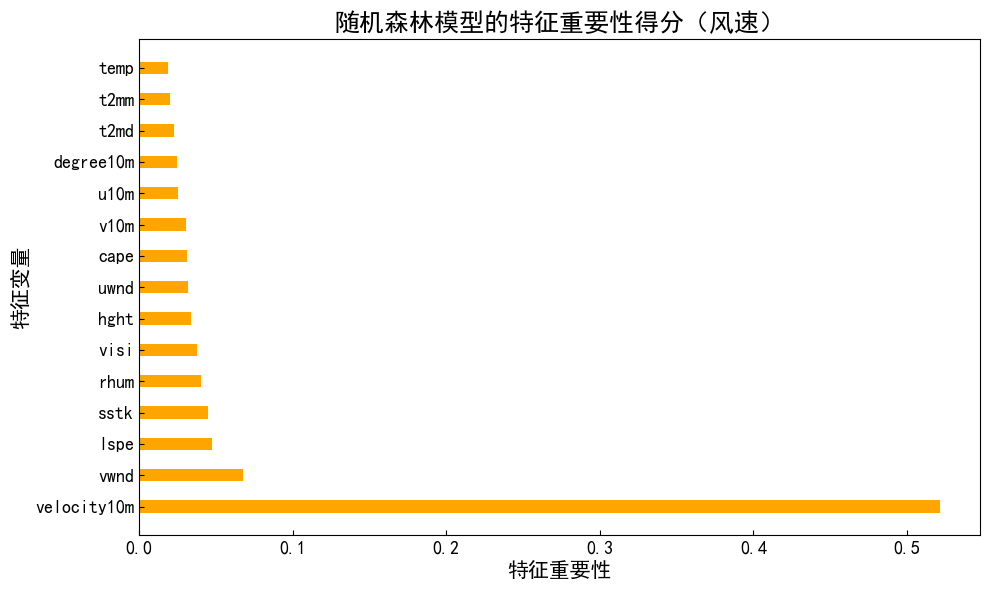

In [13]:
# 设置Matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

variable_names = ['velocity10m',
 'vwnd',
 'lspe',
 'sstk',
 'rhum',
 'visi',
 'hght',
 'uwnd',
 'cape',
 'v10m',
 'u10m',
 'degree10m',
 't2md',
 't2mm',
 'temp']
# 绘制柱状图（水平）
plt.figure(figsize=(10, 6))
plt.barh(variable_names, width=importance_values, color='orange', height=0.4)
plt.tick_params(direction='in', labelsize=13)
plt.xlabel('特征重要性', fontsize=15)
plt.ylabel('特征变量', fontsize=15)
plt.title('随机森林模型的特征重要性得分（风速）', fontsize=18)
# 显示图形
plt.tight_layout()
plt.savefig('../pic_01/RandomForest_velocity.png', dpi=300, bbox_inches='tight')
plt.show()